<img src="../pyDataCover.jpg"/>

<h3>Descriptive and Inferential Statistics</h3>
<p>Descriptive Statistics is used to summarize data. Inferential Statistics tries to uncover
attributes about a large population, often based on a sample.</p>
<p>
    What is data?
</p>

<p>Data and Photographs example</p>

<h3>Population, Samples, Bias</h3>
<p>A <strong>population</strong> is a particular group of interest we want to study.</p>
<p>A <strong>sample</strong> is a subset of the population that is ideally random and unbiased,
which we use to infer attributes about the population.</p>
<p>Bias, used to describe inaccurate representation to the population.</p>
<p>
    A <strong>selection bias</strong>; particular type of bias where
    a specific group is more likely to include themselves in a sample
</p>

<p>
    A <strong>confirmation bias</strong>, gathering data that supports your belief, which can even be done
    unknowingly. An example is following only social media accounts you politically agree
    with, reinforcing your beliefs rather than challenging them.
</p>

<h4>Mean and Weighted Mean</h4>

In [30]:
# Weighted Mean, GPA
samples = [90, 80, 63, 87]
weights = [.20, .20, .20, .40]
weighted_mean = sum(s*w for s,w in zip(samples, weights)) / sum(weights)

In [31]:
weighted_mean

81.4

In [32]:
# Weights don't have to be percentages as the numbers will endup being proportionalized.
weights = [1.0, 1.0, 1.0, 2.0]
weighted_sum = sum(s*w for s,w in zip(samples, weights))/sum(weights)
weighted_sum

81.4

In [33]:
# Median
# The middlemost value in a set of ordered values
def median(values):
    ordered = sorted(values)
    print(ordered)
    n = len(ordered)
    mid = int(n/2)-1 if n%2 == 0 else int(n/2)

    if n%2 == 0:
        return (ordered[mid] + ordered[mid+1])/2.0
    else:
        return ordered[mid]

In [34]:
# Median is the preferrable in outlier-heavy situations(such as income related data) over the mean.
# Example: Salary of Ugandans without a university degree, there shall be many outliers
median(samples)

[63, 80, 87, 90]


83.5

In [35]:
# Quartiles
# Mode is the most frequently occuring set of values. When two values occur with the same frequency, it is considered
# bimodal.
# Number of shoes your friends own
from collections import defaultdict
sample = [1, 3, 2, 5, 7, 4, 2, 3]
def mode(values):
    counts = defaultdict(lambda:0)
    for s in values:
        counts[s] += 1
    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

In [36]:
mode(sample)

[2, 3]

In [37]:
# Variance and Standard Deviation
# Population variance is the measure of how data is spreadout
# Example number of shoes owned by my friends
dataShoes = [2, 3, 6, 3, 7, 2, 8]
def variance(values):
    mean = sum(values)/len(values)
    _variance=sum((v-mean)**2 for v in values)/len(values)
    return _variance
print(variance(dataShoes))

5.387755102040816


In [38]:
# Standard deviation
from math import sqrt
def std_dev(values):
    return sqrt(variance(values))

# Example
# Standard devation of dataShoes
std_dev(dataShoes)

2.3211538298959886

In [39]:
# Sample Variance and Stadard Deviation
# Qn. Why subtract 1 from sample size

def variance(values, is_sample: bool=False):
    mean = sum(values) / len(values)
    _variance = sum((v-mean)**2 for v in values) / (len(values)-(1 if is_sample else 0))
    return _variance

def std_dev(values, is_sample:bool=False):
    return sqrt(variance(values, is_sample))

In [40]:
# Example
# Number of shoes each person owns
variance(dataShoes, is_sample=True)

6.285714285714286

In [41]:
# Contrast obtained value with variance of population
std_dev(dataShoes, is_sample=True)

# 2.5071326821120348 for sample
# 2.3211538298959886 for population

2.5071326821120348

<h3>Normal Distribution (Gaussian Distribution) and Probability Density Function</h3>
<p>
    Normal Distribution is a probability distribution that appears as a "bell curve" when graphed.
    The normal distribution describes a symmetrical plot of data around its mean value, where width of
    the curve is defined by the standard deviation.
</p>

<h5>Properties of the Normal Distribution</h5>
<ul>
    <li>Symmetrical; both sides are identically mirrored at the mean, which is the center.</li>
    <li>Most mass is at the center around the mean.</li>
    <li>It has a spread (being narrow or wide> that is specified by the standard deviation.</li>
    <li>The tails are the least likely outcomes and approach zero infinitely but never touch zero.</li>
</ul>

<h4>The Cummulative Desnsity Function, CDF</h4>
<p>
    The probability to get a value between x1 and x2, where x1 > x2, is the area under the curve from x1 to x2.
</p>

In [42]:
# the Probability Density Function in Python
def pdf(x: float,
        mean: float,
        std_dev: float):
    return (1.0/(std_dev*(2.0*math.pi)**0.5)*math.exp((-1.0*((x-mean)/std_dev)**2)/2))

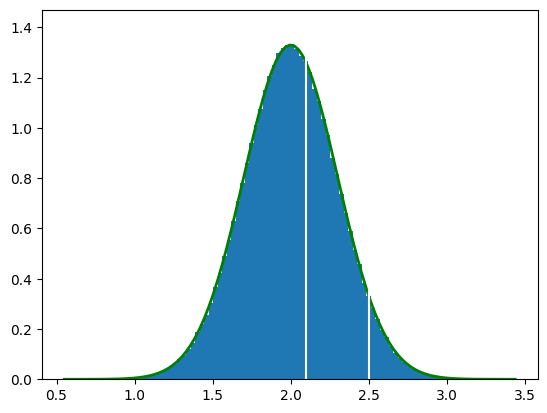

In [43]:
# Example
import matplotlib.pyplot as plt
import numpy as np
mu, std_dev = 2, 0.3 # mean and standard deviation
s = np.random.normal(mu, std_dev, 1_000_000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(std_dev*np.sqrt(2*np.pi))*np.exp(-1*(bins-mu)**2/(2*std_dev**2)),
         linewidth=2,
         color='g')
plt.vlines(2.1, 0, 1.4, "white", );
plt.vlines(2.5, 0, 0.5, "white", );
plt.show();

In [44]:
# The normal distribution CDF in Python\
# The CDF from negative infinity to the mean, we get 0.5 which half the area of the normal distribution
from scipy.stats import norm
# mu = 64.43
# std_dev = 2.99
x = norm.cdf(2, mu, std_dev)
x

np.float64(0.5)

In [45]:
# To get the proability of x being between 2.1 and 2.5
norm.cdf(2.5, mu, std_dev) - norm.cdf(2.1, mu, std_dev)

np.float64(0.32165098790894886)

<h3>The Inverse CDF</h3>
<p>
    It is used to find the x value for a given probability. For example, say you want to find the weight with a probability of 80%.
</p>
<p>The Inverse CDF can be used in simulation to generate values with proability between 0 and 1. </p>

In [46]:
x = norm.ppf(0.8, mu, std_dev)
x

np.float64(2.2524863700718742)

<h4>The Z-Score</h4>
<p>
    It is used to normalize a normal distribution so as its mean is at 0. The result is a <strong>standard normal distribution</strong>.
</p>
<p>
    The expression below converts an x-value to a z-value.
</p>
<p>
    Example: There are two homes from two different neighborhoods. Neighborhood A has a mean home value of 140,000usd and standard deviation of 3,000usd. Neighborhood B has a mean value of 800,000usd and standard deviation of 10,000usd. There are two home each neighborhood. House A is worth 150,000usd and House B is worth 815,000usd. Which house is more expensive relative to the average home in its neighborhood?
</p>

In [47]:
from sympy import *
x, mu, sigma = symbols('x, mu, sigma')
z = (x - mu)/sigma
z

(-mu + x)/sigma

In [48]:
# Solution to example problem
houseA = (150_000 - 140_000)/3_000
houseB = (815_000-800_000)/10_000

houseA, houseB
# House A is more expensive than house B

(3.3333333333333335, 1.5)

<h4>Coefficeint of Variation</h4>
<p>
    It helps to measure the spread of variation of a distribution. It is the ratio of standard deviation to mean.
</p>

<h3>Inferential Statistics</h3>
<h5>The Central Limit Theorem</h5>
<p>
    The Central Limit Theorem states that the sum of a large number of independent random variables has a distribution that is approximately normal.
</p>
<ul>
    <li>It provides a simple method for computing approximate probabilities for sums of independent random variables.</li>
    <li>Explains the remarkable fact that the empirical frequencies of so many natural populations exhibit bell-shaped (that is normal) curves.</li>
</ul>

In [49]:
# Example
import random
import plotly.express as px
sample_size = 31
sample_count = 1000
# central limit theorem, 1000 samples each with 31 random numbers between 0.0 and 1.0
x_values = [(sum([random.uniform(0.0, 1.0) for i in range(sample_size)])/sample_size) for _ in range(sample_count)]
y_values = [1 for _ in range(sample_count)]
px.histogram(x=x_values, y=y_values, nbins=20).show();

<h4>The Confidence Interval</h4>
<p>
    A range calculation showing how confidently we believe a sample mean (or other parameter) falls in a range for the population mean.
</p>

In [50]:
# Calculating the confidence interval for .95, sample mean = 64.408 and sample standard deviation = 2.05
from scipy.stats import norm
def critical_z_value(p):
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area = (1.0-p)/2.0
    upper_area = 1.0 - ((1.0-p)/2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)
critical_z_value(p=.95)

(np.float64(-1.959963984540054), np.float64(1.959963984540054))

In [51]:
# Margin of Error
# Margin of Error (E) is the range around the sample mean that contains the population mean at that level of confidence.

def confidence_interval(p, sample_mean, sample_std, n):
    # sample size must be greater than 30
    lower, upper = critical_z_value(p)
    lower_ci = lower*(sample_std/sqrt(n))
    upper_ci = upper*(sample_std/sqrt(n))
    return sample_mean + lower_ci, sample_mean + upper_ci
confidence_interval(p=0.95, sample_mean=64.408, sample_std=2.05, n=31)

(64.408 - 0.129610521558294*sqrt(31), 0.129610521558294*sqrt(31) + 64.408)

<h4>Understanding p-value</h4>
<p>
    P-value is the probability of something occuring by chance rather than because a hypothesized explanation.
</p>
<p>
    Null hypothesis, H0 poses that the variable in question had no impact on the experiment and any positive results are just random luck.
</p>

<p>
    Alternative hypothesis, H1 poses that a variable in question (called the controlled variable) is causing a positive result.
</p>

<h4>Hypothesis Testing</h4>


In [52]:
# Example: Past studies show that the mean recovery time for a cold is 18days, with a standard deviation of 1.5 days and follows a normal
# distribution.
# 95% probability recovery time takes between 15 and 21 days
from scipy.stats import norm
mean = 18
std_dev = 1.5
x = norm.cdf(21, mean, std_dev) - norm.cdf(15, mean, std_dev)
x

np.float64(0.9544997361036416)

<h3>One-tailed Test</h3>

In [53]:
# A p-value of 0.05 or less is considered statistically significant.
# There is a 5% chance of a person recovering after 21 days or less than 14days
# With 15 days or less, the drug is considered statistically significant to have shown an impact.
mean = 18
std_dev = 1.5
x = norm.ppf(.05, mean, std_dev)
x

np.float64(15.53271955957279)

In [54]:
# Calculating the one-tailed p-value
from scipy.stats import norm
# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5
# Actual Sample mean is 16 days
# Probability of 16 or less days
p_value = norm.cdf(16, mean, std_dev)
p_value

np.float64(0.09121121972586788)

In [55]:
# The p-value is higher than  0.5, thus the drug is not statistically significant

<h3>Two-tailed Test</h3>
<p>It is always practically safer and batter to use a two-tailed test.</p>

In [56]:
# Calculating a range for a statistical significance of 5%
from scipy.stats import norm
mean = 18
std_dev = 1.5
x1 = norm.ppf(.025, mean, std_dev)
x2 = norm.ppf(.975, mean, std_dev)
print(x1)
print(x2)

15.060054023189918
20.93994597681008


In [57]:
# The sample mean value is 16. Which not less than x1 and greater than x2. We still fail to reject the null hypothesis.

In [58]:
# Calculating the p-value
from scipy.stats import norm
# cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# Probability of 16 or less days
p1 = norm.cdf(16, mean, std_dev)

# Proability of 20 or more days
p2 = 1.0 - norm.cdf(20, mean, std_dev)

# p-value of both tails
p_value = p1 + p2
p_value

# p_value is greater than 0.05, thus the drug is not statistically significant.

np.float64(0.18242243945173575)

<h3>Exercise</h3>

In [70]:
# You bought a spool of 1.75 mm filament for your 3D printer. You want to
# measure how close the filament diameter really is to 1.75 mm. You use a caliper
# tool and sample the diameter five times on the spool:
# 1.78, 1.75, 1.72, 1.74, 1.77
# Calculate the mean and standard deviation for this set of values.
diameters = [1.78, 1.75, 1.72, 1.74, 1.77]
mean = sum(diameters)/len(diameters)
std_dev = std_dev(diameters, is_sample=True)
mean, std_dev

TypeError: 'float' object is not callable

In [59]:
# Exercise

norm.cdf(30, 42, 8) - norm.cdf(20, 42, 8)

np.float64(0.0638274380338035)

In [60]:
critical_z_value(p=.99)

(np.float64(-2.5758293035489004), np.float64(2.5758293035489004))

In [64]:
# Margin of Error
float((2.5758293035489004 * 0.029252)/sqrt(34))

0.012922102625134328